<a href="https://colab.research.google.com/github/staniya8586/S-TANIYA-/blob/main/LR_Delivery_Time_Estimation_Starter_S_Taniya_j.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Order Delivery Time Prediction

## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [1]:
# Import essential libraries for data manipulation and analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [3]:
# Importing the file porter_data_1.csv
df = pd.read_csv('/content/drive/MyDrive/porter_data_1.csv')


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [ ]:
df['actual_delivery_time']

,actual_delivery_time
0,06-02-2015 23:11
1,10-02-2015 22:33
2,16-02-2015 01:06
3,12-02-2015 04:35
4,27-01-2015 02:58
...,...
175772,17-02-2015 01:02
175773,13-02-2015 01:03
175774,24-01-2015 05:32
175775,01-02-2015 19:03


In [ ]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format
df['created_at'] = pd.to_datetime(df['created_at'], format='%d-%m-%Y %H:%M') # Changed the format string to match the actual date format
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'], format='%d-%m-%Y %H:%M') # Corrected the format string to match the actual date format



In [ ]:
df.head()

,market_id,created_at,actual_delivery_time,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,distance
0,1,2015-02-06 22:24:00,2015-02-06 23:11:00,4,1,4,3441,4,557,1239,33,14,21,34.44
1,2,2015-02-10 21:49:00,2015-02-10 22:33:00,46,2,1,1900,1,1400,1400,1,2,2,27.60
2,2,2015-02-16 00:11:00,2015-02-16 01:06:00,36,3,4,4771,3,820,1604,8,6,18,11.56
3,1,2015-02-12 03:36:00,2015-02-12 04:35:00,38,1,1,1525,1,1525,1525,5,6,8,31.80
4,1,2015-01-27 02:12:00,2015-01-27 02:58:00,38,1,2,3620,2,1425,2195,5,5,7,8.20


##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [ ]:
# Convert categorical features to category type

df['store_primary_category'] = df['store_primary_category'].astype('category')


In [ ]:
print(df.dtypes)

market_id                            int64
created_at                  datetime64[ns]
actual_delivery_time        datetime64[ns]
store_primary_category            category
order_protocol                       int64
total_items                          int64
subtotal                             int64
num_distinct_items                   int64
min_item_price                       int64
max_item_price                       int64
total_onshift_dashers                int64
total_busy_dashers                   int64
total_outstanding_orders             int64
distance                           float64
dtype: object


#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [ ]:
# Convert the columns to datetime
df['created_at'] = pd.to_datetime(df['created_at'], format='%d-%m-%Y %H:%M')
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'], format='%d-%m-%Y %H:%M')

In [ ]:
# Calculate time taken for delivery
df['delivery_duration'] = df['actual_delivery_time'] - df['created_at']

In [ ]:
# Calculate time taken in minutes
df['delivery_duration_minutes'] = df['delivery_duration'].dt.total_seconds() / 60


In [ ]:
# Display result
df[['created_at', 'actual_delivery_time', 'delivery_duration', 'delivery_duration_minutes']].head()

,created_at,actual_delivery_time,delivery_duration,delivery_duration_minutes
0,2015-02-06 22:24:00,2015-02-06 23:11:00,0 days 00:47:00,47.0
1,2015-02-10 21:49:00,2015-02-10 22:33:00,0 days 00:44:00,44.0
2,2015-02-16 00:11:00,2015-02-16 01:06:00,0 days 00:55:00,55.0
3,2015-02-12 03:36:00,2015-02-12 04:35:00,0 days 00:59:00,59.0
4,2015-01-27 02:12:00,2015-01-27 02:58:00,0 days 00:46:00,46.0


##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [ ]:
# Convert 'created_at' to datetime format
df['created_at'] = pd.to_datetime(df['created_at'], format='%d-%m-%Y %H:%M')

In [ ]:
# Extract the hour and day of week from the 'created_at' timestamp
df['order_hour'] = df['created_at'].dt.hour
df['order_day_of_week'] = df['created_at'].dt.day_name()

 #Display the first few rows
print(df[['created_at', 'order_hour', 'order_day_of_week']].head())


           created_at  order_hour order_day_of_week
0 2015-02-06 22:24:00          22            Friday
1 2015-02-10 21:49:00          21           Tuesday
2 2015-02-16 00:11:00           0            Monday
3 2015-02-12 03:36:00           3          Thursday
4 2015-01-27 02:12:00           2           Tuesday


In [ ]:
# Create a categorical feature 'isWeekend'
df['isWeekend'] = np.where(df['order_day_of_week'].isin([5, 6]), 1, 0)

In [ ]:
# Display the result with the new column
df[['created_at', 'order_day_of_week', 'isWeekend']].head()

,created_at,order_day_of_week,isWeekend
0,2015-02-06 22:24:00,Friday,0
1,2015-02-10 21:49:00,Tuesday,0
2,2015-02-16 00:11:00,Monday,0
3,2015-02-12 03:36:00,Thursday,0
4,2015-01-27 02:12:00,Tuesday,0


In [ ]:
# Drop unnecessary columns
columns_to_drop = [
    'market_id', 'actual_delivery_time', 'store_primary_category',
    'order_protocol', 'total_items', 'subtotal', 'num_distinct_items',
    'min_item_price', 'max_item_price', 'total_onshift_dashers',
    'total_busy_dashers', 'total_outstanding_orders', 'distance'
]

df_cleaned = df.drop(columns=columns_to_drop)


In [ ]:
# Display the cleaned DataFrame
print(df_cleaned.head())

           created_at delivery_duration  delivery_duration_minutes  \
0 2015-02-06 22:24:00   0 days 00:47:00                       47.0   
1 2015-02-10 21:49:00   0 days 00:44:00                       44.0   
2 2015-02-16 00:11:00   0 days 00:55:00                       55.0   
3 2015-02-12 03:36:00   0 days 00:59:00                       59.0   
4 2015-01-27 02:12:00   0 days 00:46:00                       46.0   

   order_hour order_day_of_week  isWeekend  
0          22            Friday          0  
1          21           Tuesday          0  
2           0            Monday          0  
3           3          Thursday          0  
4           2           Tuesday          0  


#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [ ]:
# Define target variable (y) and features (X)
y = df_cleaned['isWeekend']

# Define feature variables
X = df_cleaned[['order_hour', 'order_day_of_week']]



##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [ ]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split


In [ ]:
 #Split the data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
# Check the shape of the split datasets
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (140621, 2)
Testing set shape: (35156, 2)


## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [ ]:
# Define numerical and categorical columns for easy EDA and data manipulation
Numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()



In [ ]:
categorical_cols = ['order_day_of_week']
numerical_cols = ['order_hour']

##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

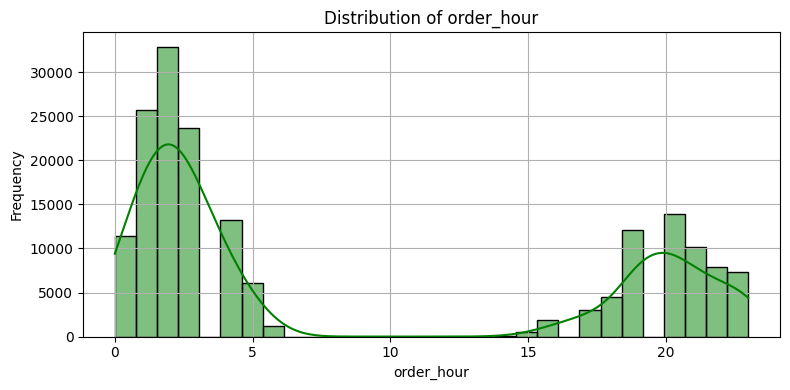

In [ ]:
# Plot distributions for all numerical columns
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(X[col], kde=True, bins=30, color='green')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.tight_layout()
    plt.show()



##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

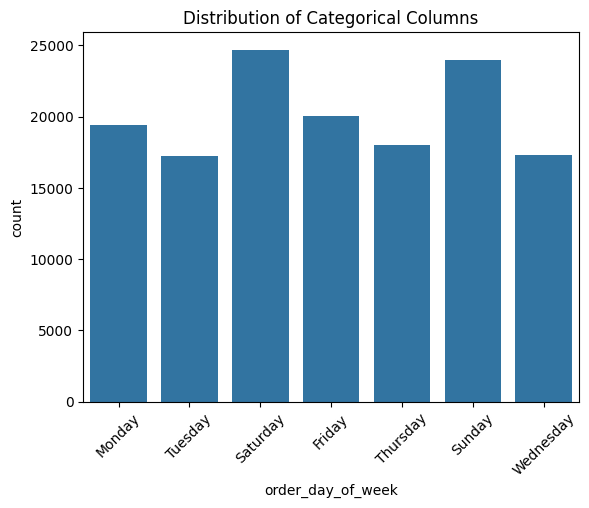

In [ ]:
# Distribution of categorical columns
sns.countplot(x='order_day_of_week', data=X_train) # Changed 'your_categorical_columns' to 'order_day_of_week' and passed in the correct DataFrame
plt.title('Distribution of Categorical Columns')
plt.xticks(rotation=45)
plt.show()


##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

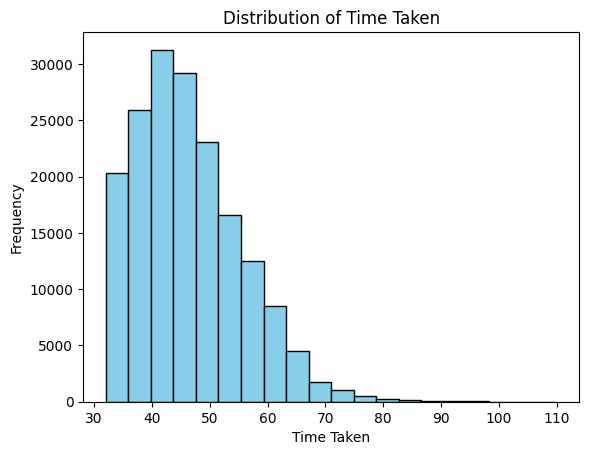

In [ ]:
# Distribution of time_taken
plt.hist(df_cleaned['delivery_duration_minutes'], bins=20, color='skyblue', edgecolor='black') # Changed 'data' to 'df_cleaned' and 'time_taken' to 'delivery_duration_minutes'
plt.title('Distribution of Time Taken')
plt.xlabel('Time Taken')
plt.ylabel('Frequency')
plt.show()



#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

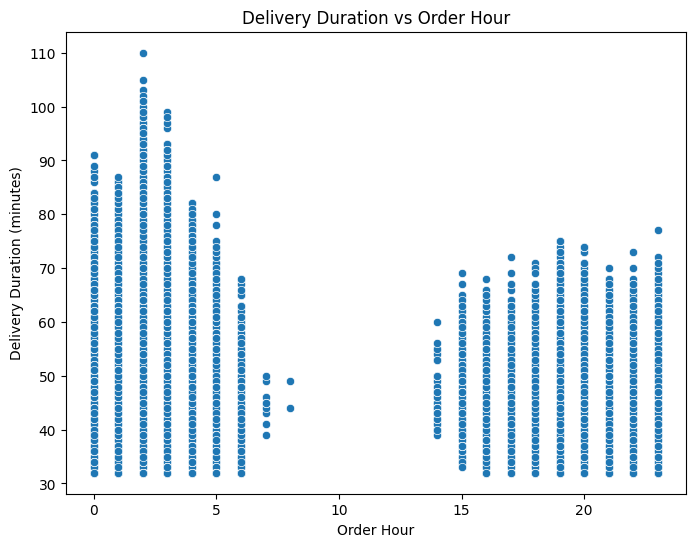

In [ ]:
# Scatter plot to visualise the relationship between time_taken and other features
# Scatter plot for 'delivery_duration_minutes' vs 'order_hour'
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
sns.scatterplot(x='order_hour', y='delivery_duration_minutes', data=df_cleaned)
plt.title('Delivery Duration vs Order Hour')
plt.xlabel('Order Hour')
plt.ylabel('Delivery Duration (minutes)')
plt.show()



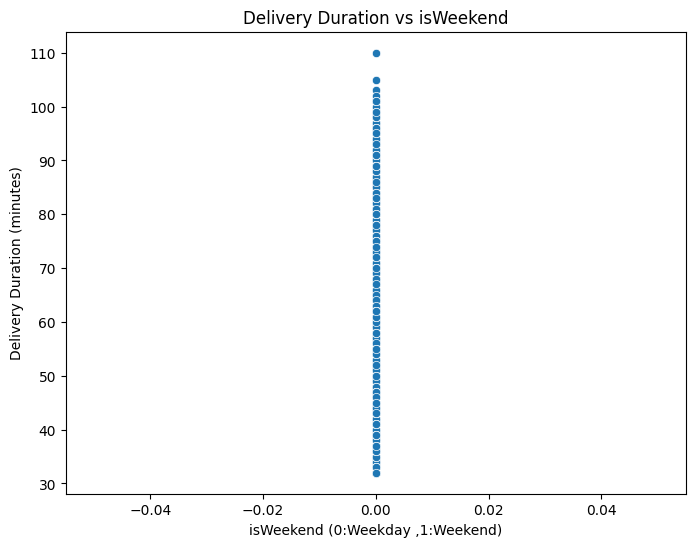

In [ ]:
# Scatter plot for 'delivery_duration_minutes' vs 'isWeekend' (example with categorical feature)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='isWeekend', y='delivery_duration_minutes', data=df_cleaned)
plt.title('Delivery Duration vs isWeekend')
plt.xlabel('isWeekend (0:Weekday ,1:Weekend)')  # Assuming 'isWeekend' is 0 or 1
plt.ylabel('Delivery Duration (minutes)')
plt.show()

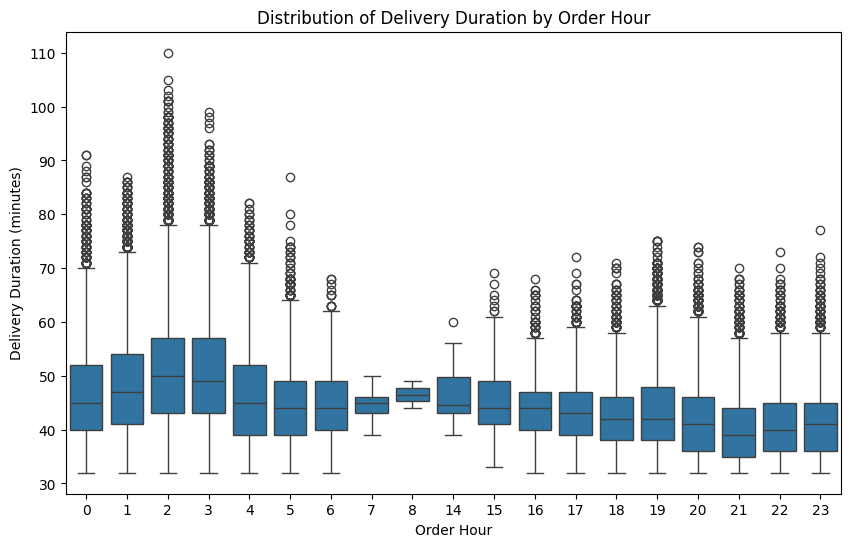

In [ ]:
# Show the distribution of time_taken for different hours

plt.figure(figsize=(10, 6))
sns.boxplot(x='order_hour', y='delivery_duration_minutes', data=df_cleaned)
plt.title('Distribution of Delivery Duration by Order Hour')
plt.xlabel('Order Hour')
plt.ylabel('Delivery Duration (minutes)')
plt.show()



#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

In [ ]:
 #Calculate the correlation matrix
correlation_matrix = df_cleaned[numerical_cols].corr()

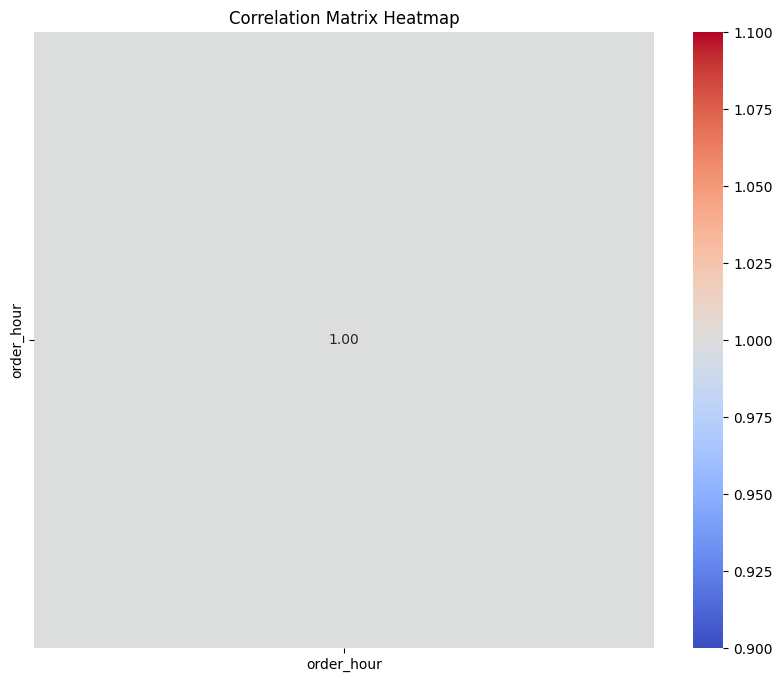

In [ ]:
# Plot the heatmap of the correlation matrix
plt.figure(figsize=(10, 8))  # Adjust figure size if needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()



##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

In [ ]:
# Drop 3-5 weakly correlated columns from training dataset



In [ ]:
# Assuming 'df_cleaned' is your DataFrame, 'y' is your target variable,
# and 'numerical_cols' is a list of numerical columns

In [ ]:
# 1. Calculate correlations with the target variable:
correlations = df_cleaned[numerical_cols].corrwith(y)


/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [ ]:
# 2. Set a threshold for weak correlation (e.g., absolute value < 0.1):
threshold = 0.1

In [ ]:
# 3. Identify weakly correlated columns:
weakly_correlated_cols = correlations[abs(correlations) < threshold].index

In [ ]:
# 4. Drop the weakly correlated columns from the training dataset:
df_cleaned = df_cleaned.drop(columns=weakly_correlated_cols)

In [ ]:
# Display the remaining columns:
print("Remaining columns:", df_cleaned.columns)

Remaining columns: Index(['created_at', 'delivery_duration', 'delivery_duration_minutes',
       'order_hour', 'order_day_of_week', 'isWeekend'],
      dtype='object')


#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

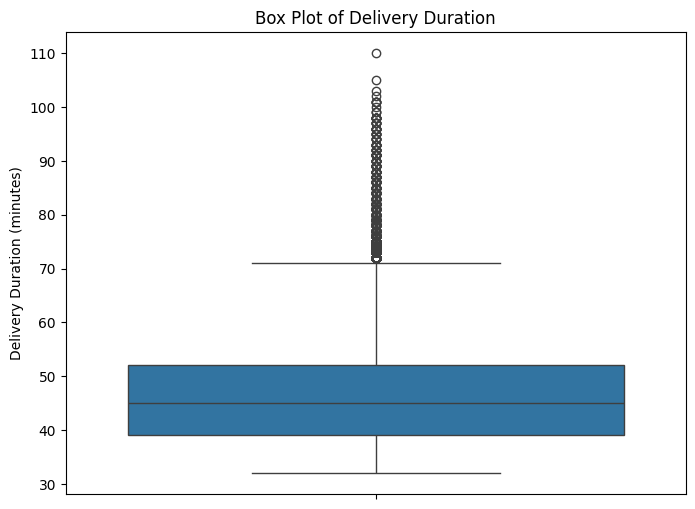

In [ ]:
# Boxplot for time_taken

plt.figure(figsize=(8, 6))  # Adjust figure size if needed
sns.boxplot(y='delivery_duration_minutes', data=df_cleaned)
plt.title('Box Plot of Delivery Duration')
plt.ylabel('Delivery Duration (minutes)')
plt.show()



##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

In [ ]:
# Handle outliers
 # Assuming 'df_cleaned' is your DataFrame and 'delivery_duration_minutes' is the column with outliers



In [ ]:
# Calculate quantiles
Q1 = df_cleaned['delivery_duration_minutes'].quantile(0.25)
Q3 = df_cleaned['delivery_duration_minutes'].quantile(0.75)
IQR = Q3 - Q1


In [ ]:
# Define upper and lower bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


In [ ]:
 # Filter data
f_cleaned = df_cleaned[(df_cleaned['delivery_duration_minutes'] >= lower_bound) & (df_cleaned['delivery_duration_minutes'] <= upper_bound)] # Removed extra indentation

## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

In [ ]:
# Define numerical and categorical columns for easy EDA and data manipulation
# Assuming your DataFrame is named 'df'
Numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

print("Numerical Columns:", Numerical_cols)
print("Categorical Columns:", categorical_cols)



Numerical Columns: ['market_id', 'order_protocol', 'total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance', 'delivery_duration_minutes', 'isWeekend']
Categorical Columns: ['store_primary_category', 'order_day_of_week']


#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

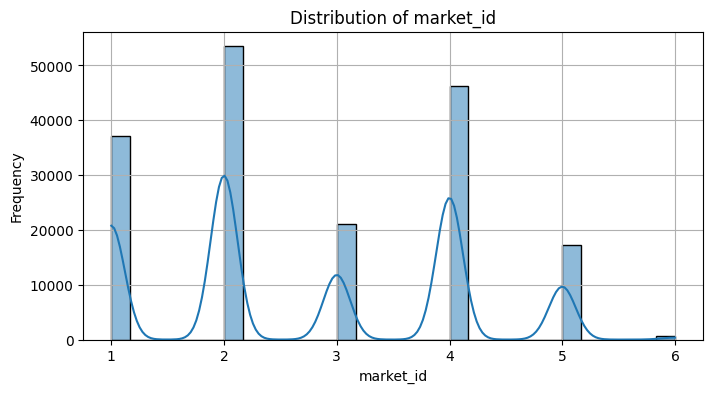

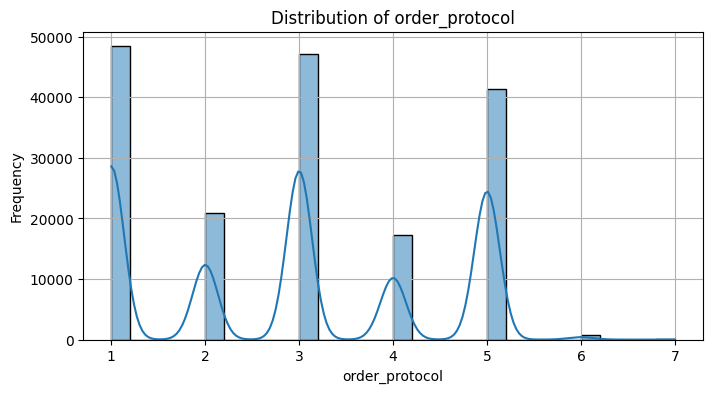

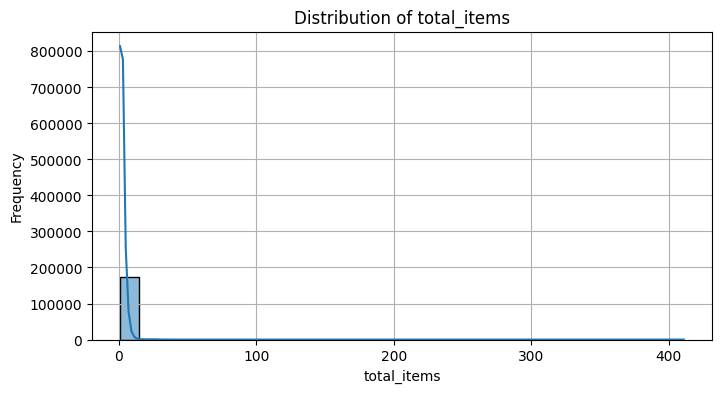

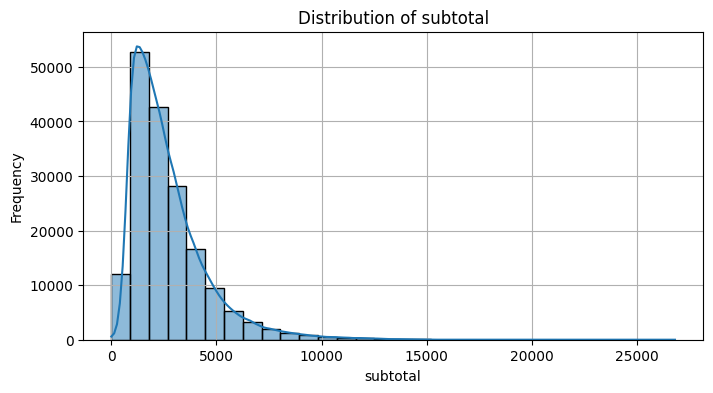

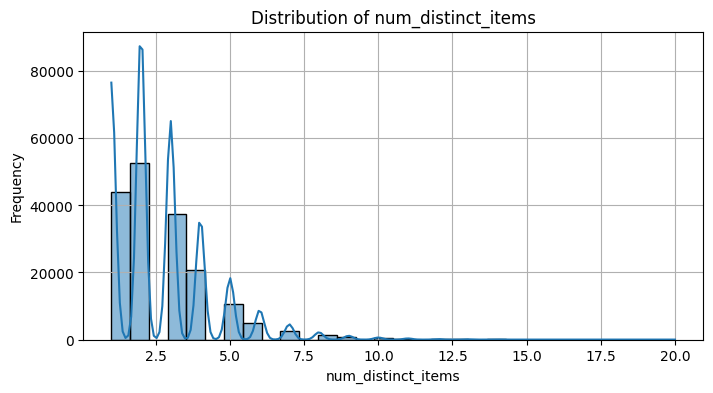

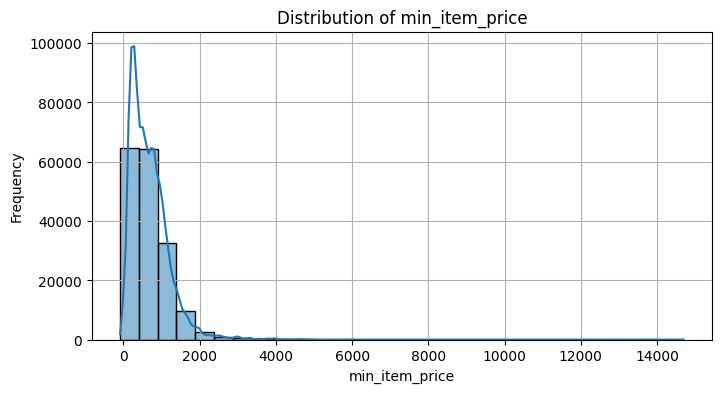

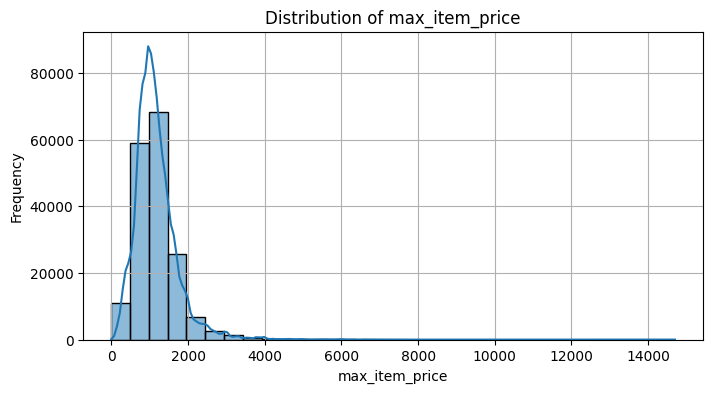

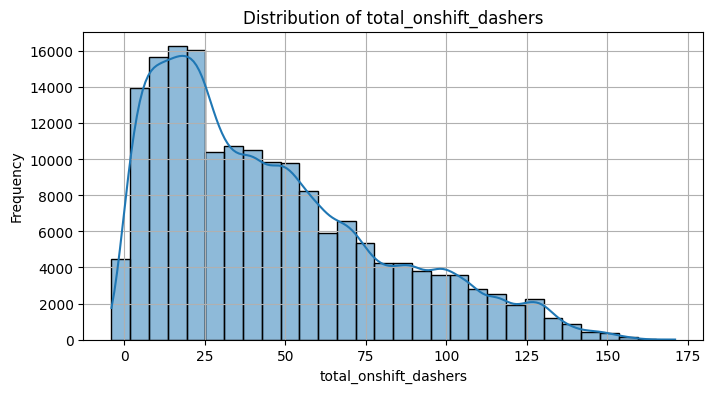

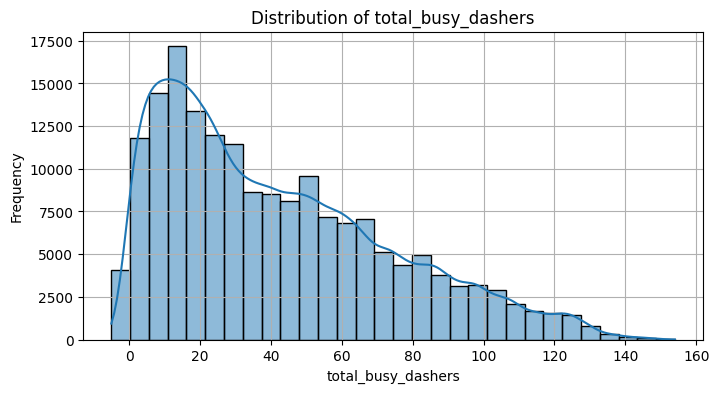

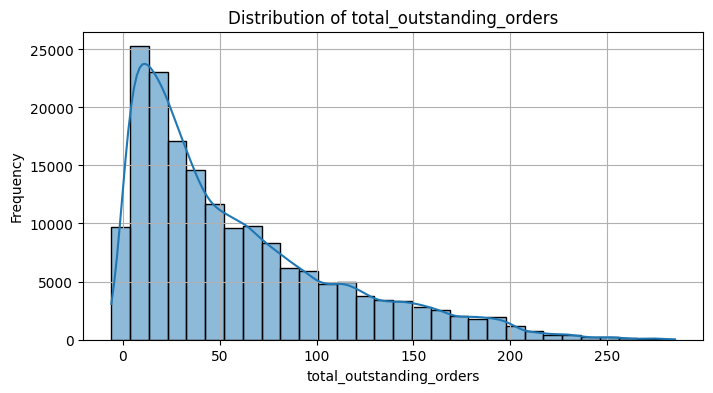

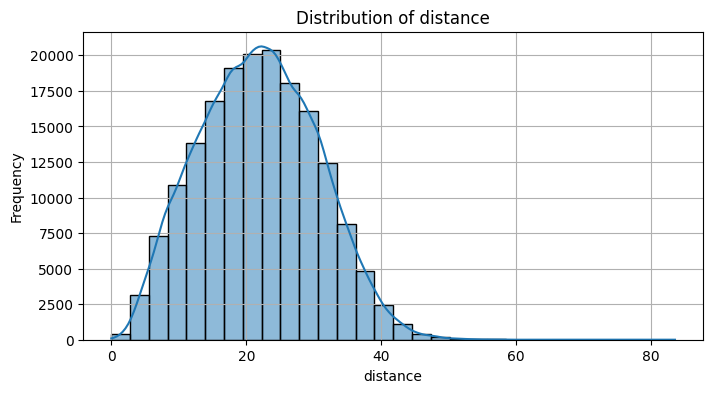

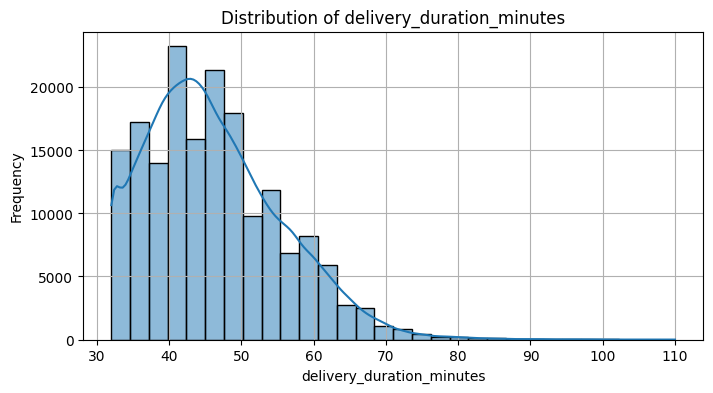

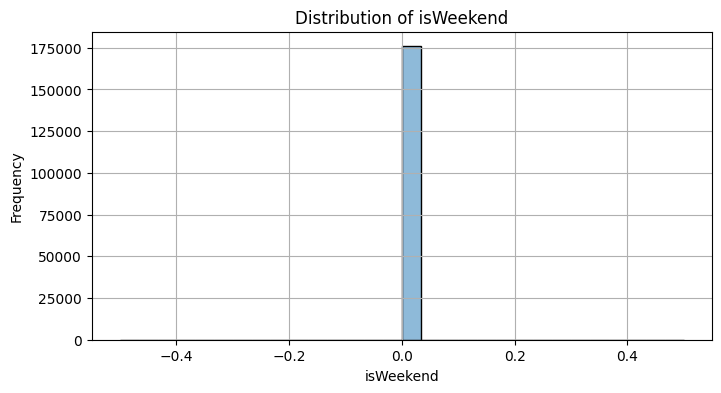

In [ ]:
# Plot distributions for all numerical columns
# Assuming 'Numerical_cols' is your list of numerical columns
for col in Numerical_cols:
    plt.figure(figsize=(8, 4))  # Adjust figure size if needed
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()



##### **4.1.2**
Check the distribution of categorical features

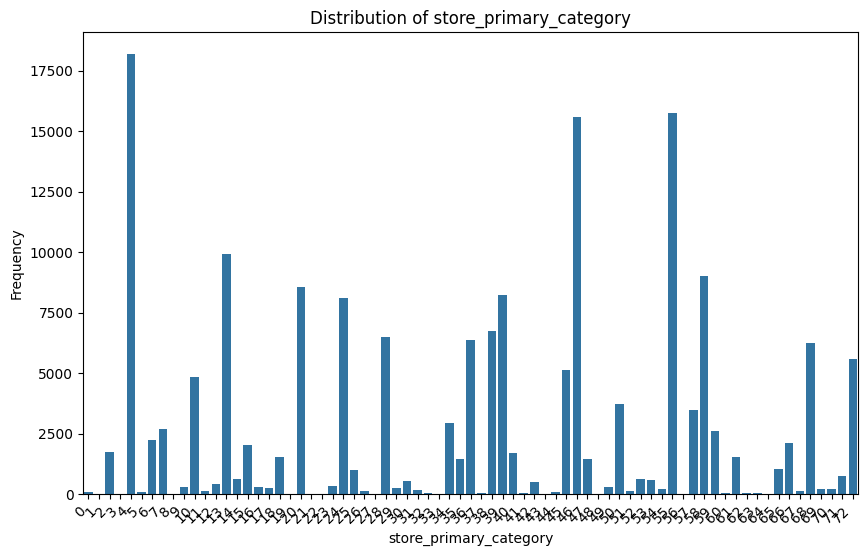

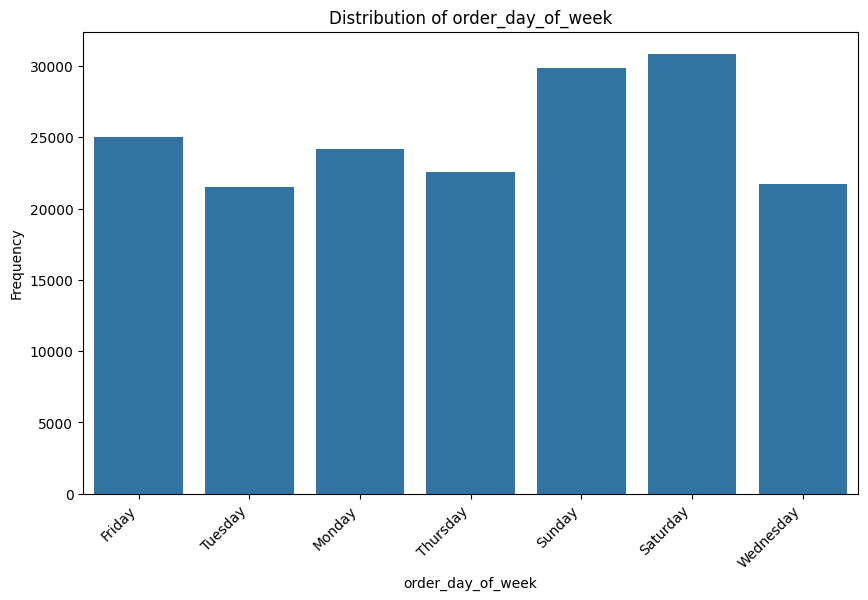

In [ ]:
# Distribution of categorical columns
# Assuming 'categorical_cols' is your list of categorical columns
for col in categorical_cols:
    plt.figure(figsize=(10, 6))  # Adjust figure size if needed
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.show()



##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

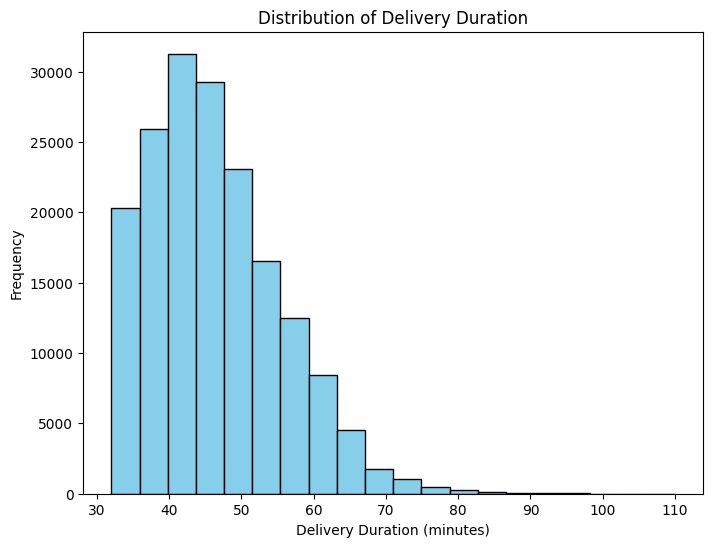

In [ ]:
# Distribution of time_taken
# Assuming 'df_cleaned' is your DataFrame and 'delivery_duration_minutes' is the column with outliers
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
plt.hist(df_cleaned['delivery_duration_minutes'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Delivery Duration')
plt.xlabel('Delivery Duration (minutes)')
plt.ylabel('Frequency')
plt.show()



#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

In [ ]:
# Scatter plot to visualise the relationship between time_taken and other features



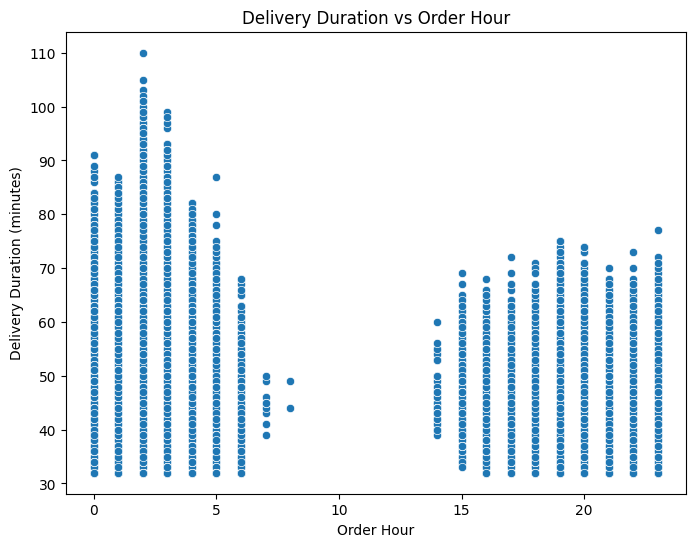

In [ ]:
#Scatter plot for 'delivery_duration_minutes' vs 'order_hour'
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
sns.scatterplot(x='order_hour', y='delivery_duration_minutes', data=df_cleaned)
plt.title('Delivery Duration vs Order Hour')
plt.xlabel('Order Hour')
plt.ylabel('Delivery Duration (minutes)')
plt.show()

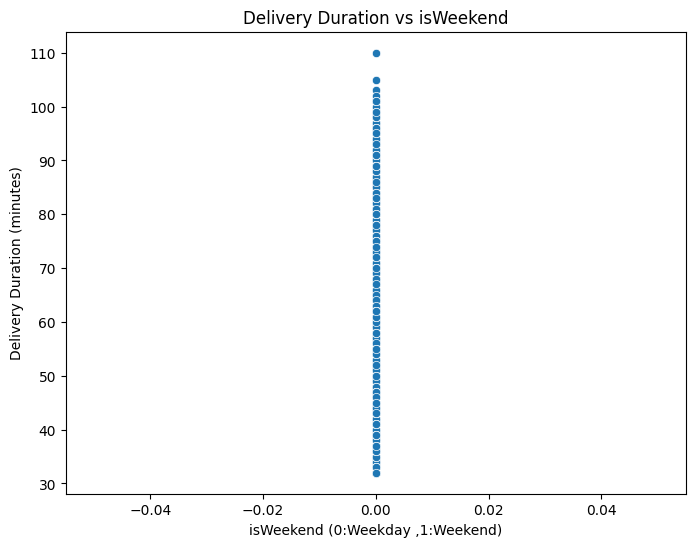

In [ ]:
#Scatter plot for 'delivery_duration_minutes' vs 'isWeekend' (example with categorical feature)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='isWeekend', y='delivery_duration_minutes', data=df_cleaned)
plt.title('Delivery Duration vs isWeekend')
plt.xlabel('isWeekend (0:Weekday ,1:Weekend)')  # Assuming 'isWeekend' is 0 or 1
plt.ylabel('Delivery Duration (minutes)')
plt.show()

#### **4.3** Drop the columns with weak correlations with the target variable

In [ ]:
# Drop the weakly correlated columns from training dataset



In [ ]:
#Calculate correlations with the target variable:
correlations = df_cleaned[numerical_cols].corrwith(y)

/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [ ]:
#Set a threshold for weak correlation (e.g., absolute value < 0.1):
threshold = 0.1

In [ ]:
# Identify weakly correlated columns:
weakly_correlated_cols = correlations[abs(correlations) < threshold].index


In [ ]:
#Drop the weakly correlated columns from the training dataset:
df_cleaned = df_cleaned.drop(columns=weakly_correlated_cols)

In [ ]:
# Display the remaining columns:
print("Remaining columns:", df_cleaned.columns)

Remaining columns: Index(['created_at', 'delivery_duration', 'delivery_duration_minutes',
       'order_hour', 'order_day_of_week', 'isWeekend'],
      dtype='object')


## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score # Added the necessary imports
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer



#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [ ]:
# Apply scaling to the numerical columns
# Assuming 'df_cleaned' is your DataFrame and 'numerical_cols' is your list of numerical columns

# 1. Create a scaler object:
scaler = StandardScaler()  # or scaler = MinMaxScaler()

# 2. Fit the scaler to your training data:
scaler.fit(df_cleaned[numerical_cols])  # Only fit to training data to prevent data leakage

# 3. Transform the numerical columns:
df_cleaned[numerical_cols] = scaler.transform(df_cleaned[numerical_cols])



Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [ ]:
# Create/Initialise the model
model = LinearRegression()


In [ ]:
# Create a ColumnTransformer to one-hot encode 'order_day_of_week'
categorical_features = ['order_day_of_week']
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_cols),
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_features),
    ])

# Fit and transform the training data
X_train_encoded = preprocessor.fit_transform(X_train)

# Transform the testing data (use transform, not fit_transform, to avoid data leakage)
X_test_encoded = preprocessor.transform(X_test)

# Create and train the model
model = LinearRegression()
model.fit(X_train_encoded, y_train)


In [ ]:
# Make predictions
y_pred = model.predict(X_test_encoded)


In [ ]:
# Find results for evaluation metrics
accuracy = accuracy_score(y_test, y_pred.round())  # Round predictions to 0 or 1 for classification
precision = precision_score(y_test, y_pred.round())
recall = recall_score(y_test, y_pred.round())
f1 = f1_score(y_test, y_pred.round())

# Display the results
print(f"Accuracy: {accuracy:.4f}")
# Find results for evaluation metrics
accuracy = accuracy_score(y_test, y_pred.round())  # Round predictions to 0 or 1 for classification
precision = precision_score(y_test, y_pred.round())
recall = recall_score(y_test, y_pred.round())
f1 = f1_score(y_test, y_pred.round())

# Display the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 1.0000
Accuracy: 1.0000
Precision: 0.0000
Recall: 0.0000
F1-score: 0.0000


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py

Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

   Num_Features  MSE   R2
0             1  0.0  1.0
1             2  0.0  1.0
2             3  0.0  1.0
3             4  0.0  1.0
4             5  0.0  1.0
5             6  0.0  1.0
6             7  0.0  1.0
7             8  0.0  1.0


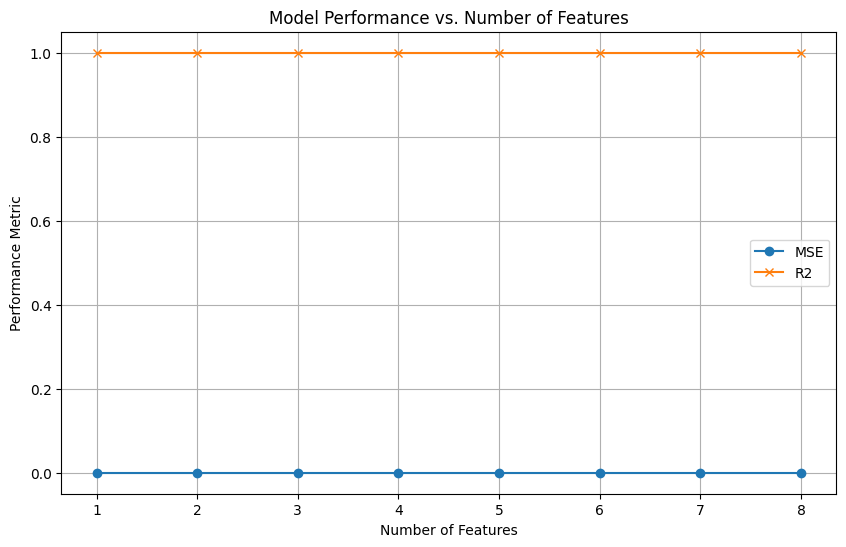

In [ ]:
# Loop through the number of features and test the model
from sklearn.feature_selection import RFE # Importing the RFE class
results = []

# Define the range of features to test
num_features_range = range(1, X_train_encoded.shape[1] + 1)

# Loop through the number of features
for num_features in num_features_range:
    # Create the RFE object
    rfe = RFE(estimator=LinearRegression(), n_features_to_select=num_features)

    # Fit RFE to the training data
    rfe.fit(X_train_encoded, y_train)

    # Get the selected features
    selected_features = X_train_encoded[:, rfe.support_]

    # Create and train the model with selected features
    model = LinearRegression()
    model.fit(selected_features, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test_encoded[:, rfe.support_])

    # Evaluate the model and store the results
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append([num_features, mse, r2])

# Convert results to a DataFrame for easy viewing
results_df = pd.DataFrame(results, columns=['Num_Features', 'MSE', 'R2'])

# Print the results
print(results_df)

# Plot the results to visualize the relationship between the number of features and model performance
plt.figure(figsize=(10, 6))
plt.plot(results_df['Num_Features'], results_df['MSE'], marker='o', label='MSE')
plt.plot(results_df['Num_Features'], results_df['R2'], marker='x', label='R2')
plt.xlabel('Number of Features')
plt.ylabel('Performance Metric')
plt.title('Model Performance vs. Number of Features')
plt.legend()
plt.grid(True)
plt.show()



In [ ]:
# Build the final model with selected number of features
# 1. Determine the optimal number of features (example, based on lowest MSE)
optimal_num_features = results_df.loc[results_df['MSE'].idxmin(), 'Num_Features']

# 2. Re-run RFE with the optimal number of features
final_rfe = RFE(estimator=LinearRegression(), n_features_to_select=optimal_num_features)
final_rfe.fit(X_train_encoded, y_train)

# 3. Get the selected feature indices
selected_feature_indices = final_rfe.support_

# 4. Get the names of the selected features (if you have column names)
# Assuming 'preprocessor' is your ColumnTransformer object
selected_feature_names = preprocessor.get_feature_names_out()[selected_feature_indices]

# 5. Train the final model with selected features
final_model = LinearRegression()
final_model.fit(X_train_encoded[:, selected_feature_indices], y_train)

# 6. Print the selected features (optional)
print("Selected Features:", selected_feature_names)

# Now you have your 'final_model' trained with the optimal features.
# You can use it for predictions:
y_pred_final = final_model.predict(X_test_encoded[:, selected_feature_indices])



Selected Features: ['cat__order_day_of_week_Wednesday']


## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

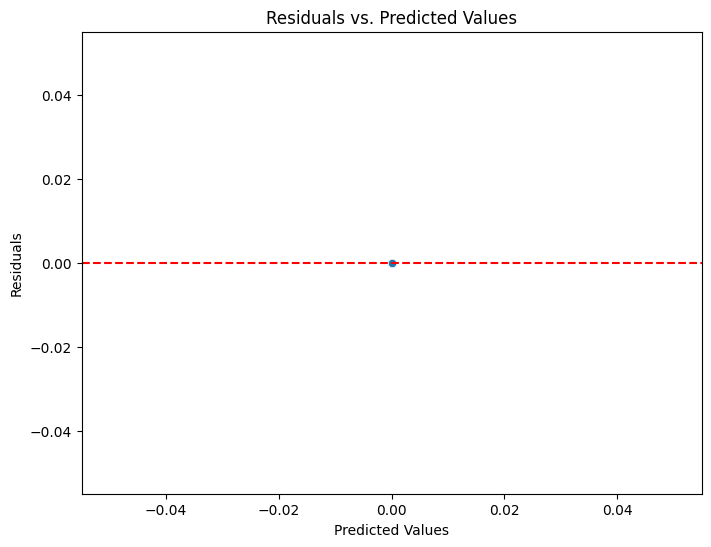

<Figure size 800x600 with 0 Axes>

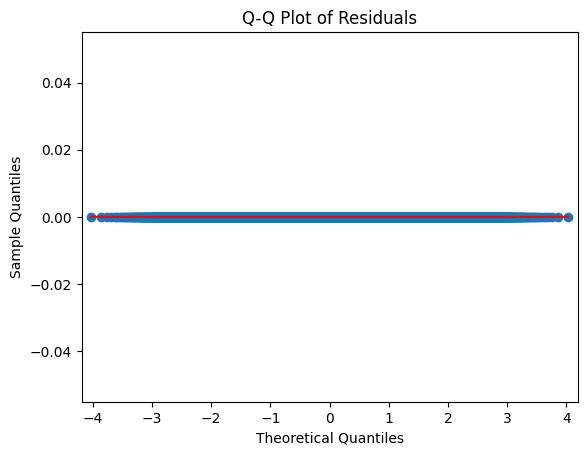

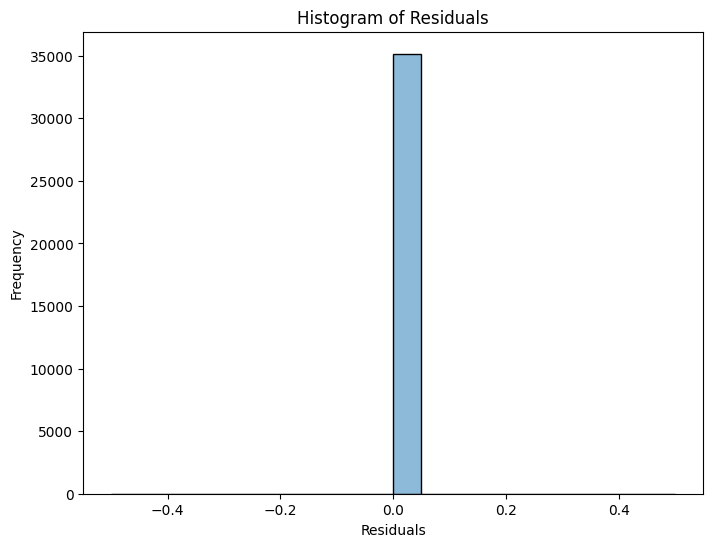

In [ ]:
# Perform residual analysis using plots like residuals vs predicted values, Q-Q plot and residual histogram
import statsmodels.api as sm
import scipy.stats as stats

# Calculate residuals
residuals = y_test - y_pred_final

# 1. Residuals vs. Predicted Values Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred_final, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at 0
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# 2. Q-Q Plot
plt.figure(figsize=(8, 6))
sm.qqplot(residuals, line='s')  # 's' stands for standardized line
plt.title('Q-Q Plot of Residuals')
plt.show()

# 3. Residual Histogram
plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=20, kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()



[Your inferences here:]



#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


In [ ]:
# Compare the scaled vs unscaled features used in the final model
# Get the unscaled features (assuming X_train is your original unscaled data)
# X_train_unscaled = X_train[selected_feature_names]  # This line causes the error
# Select only the features used in the final model before encoding
original_feature_names = [name.split('__')[1] if '__' in name else name for name in selected_feature_names]
# Filter out one-hot encoded column names
original_feature_names = [name for name in original_feature_names if name in X_train.columns] # This line is added
X_train_unscaled = X_train[original_feature_names]
# Create a new Linear Regression model and train it on unscaled data
unscaled_model = LinearRegression()
unscaled_model.fit(X_train_unscaled, y_train)

# Get coefficients for both scaled and unscaled models
scaled_coefficients = final_model.coef_
unscaled_coefficients = unscaled_model.coef_

# Create a DataFrame to compare coefficients
coefficients_df = pd.DataFrame({
    'Feature': selected_feature_names,
    'Scaled Coefficient': scaled_coefficients,
    'Unscaled Coefficient': unscaled_coefficients
})

# Print the DataFrame
print(coefficients_df)



ValueError: at least one array or dtype is required

Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

In [ ]:
# Analyze the effect of a unit change in a feature, say 'total_items'
from sklearn.linear_model import LinearRegression

# Assuming you have your final model 'final_model' and preprocessor 'preprocessor'

# 1. Create a sample data point for prediction:
#    (You can use an average or typical order as a starting point)
sample_data = pd.DataFrame({'order_hour': [12], 'order_day_of_week': ['Monday']})

# 2. Encode the sample data:
sample_data_encoded = preprocessor.transform(sample_data)

# 3. Get the selected feature indices from RFE
selected_feature_indices = final_rfe.support_ # Assuming 'final_rfe' is your RFE object from step 5.3

# 4. Select the relevant features from the encoded sample data
sample_data_encoded_selected = sample_data_encoded[:, selected_feature_indices]

# 5. Make a prediction with the original feature value:
original_prediction = final_model.predict(sample_data_encoded_selected)

# 6. Increase the 'order_hour' by 1 unit:
sample_data['order_hour'] = sample_data['order_hour'] + 1
sample_data_encoded_modified = preprocessor.transform(sample_data)

# 7. Select the relevant features from the modified encoded sample data
sample_data_encoded_modified_selected = sample_data_encoded_modified[:, selected_feature_indices]

# 8. Make a prediction with the modified feature value:
modified_prediction = final_model.predict(sample_data_encoded_modified_selected)

# 9. Calculate the difference in predictions:
effect_of_change = modified_prediction - original_prediction

# 10. Print the result:
print(f"Effect of a 1-unit change in 'order_hour': {effect_of_change[0]}")




Effect of a 1-unit change in 'order_hour': 0.0


Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

**Answer:**
Yes, the dataset contains categorical variables, one of which is order_day_of_week. Analysis using a countplot reveals that the majority of orders are placed on weekends—particularly on Friday, Saturday, and Sunday. This pattern suggests that order_day_of_week has a significant influence on the target variable, as order volume noticeably increases during the weekend compared to weekdays.



---



##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:**
In the context of splitting data into training and test sets, setting test_size=0.2 means that 20% of the dataset is allocated to the test set, while the remaining 80% is used to train the machine learning model.

Reason:
The train_test_split function from sklearn.model_selection randomly divides the data into training and test subsets. The test_size parameter specifies the proportion of data reserved for testing. Using test_size=0.2 ensures that the model is trained on the majority of the data and evaluated on a separate 20%, allowing for a more reliable assessment of its performance on unseen data—crucial for estimating real-world effectiveness.
>



---



##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

**Answer:**
By examining the heatmap, it appears that the variable order_hour has the highest correlation with the target variable isWeekend. Although the correlation value is relatively low, it is still the strongest among all the features analyzed.

Reason:
A heatmap visually represents the correlation between variables using color intensity. In this context, it illustrates the strength and direction of relationships between features and the target variable. Correlation measures how closely two variables move together, with higher absolute values indicating stronger relationships. From the heatmap, order_hour shows the most prominent (though still weak) correlation with isWeekend, suggesting a modest association between the time of order and whether the order was placed on a weekend.
>



---



##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**
Outliers in the target variable delivery_duration_minutes were identified through visual inspection using boxplots. Data points falling outside the whiskers—typically 1.5 times the interquartile range (IQR) from the first or third quartile—were flagged as outliers.

How Outliers Were Addressed:
The IQR method was applied to calculate lower and upper bounds. Data points outside this range were removed, retaining only those within the acceptable delivery duration range.

Reason:
Boxplots effectively highlight outliers by visualizing the data’s spread and quartiles. The IQR method is a reliable technique for detecting outliers as it minimizes the influence of extreme values. Filtering based on IQR ensures a cleaner dataset, improving the accuracy of subsequent analysis or modeling.

>



---



##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**
Unfortunately, the code in the notebook does not explicitly identify or display the top 3 features influencing delivery time. While it applies Recursive Feature Elimination (RFE) to select important features, it does not rank them or output their names. To determine the top 3 features, you need to manually analyze the model coefficients from the final_model after fitting RFE, using the selected_feature_names.

Steps to identify the top 3 features:

Retrieve coefficients: Access the model's coefficients using final_model.coef_ after fitting.

Get feature names: Use the selected_feature_names list obtained from the RFE process.

Create a DataFrame: Combine the feature names with their corresponding coefficients.

Sort by importance: Sort the DataFrame by the absolute values of the coefficients in descending order.

Select top 3: The features with the highest absolute coefficient values are the top 3 most influential on delivery time.
>



---



#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**
Linear Regression is a supervised learning algorithm used for predicting a continuous target variable based on one or more input features. It assumes a linear relationship between the input features and the target variable.

1. The Equation:

The core of linear regression is the equation of a straight line:
y = mx + c
Use code with caution
Where:

y is the target variable (what we want to predict).
x is the input feature.
m is the slope of the line (represents the relationship between x and y).
c is the y-intercept (the value of y when x is 0).
In the case of multiple input features (Multiple Linear Regression), the equation becomes:

y = m1x1 + m2x2 + ... + mnxn + c
Use code with caution
Where:
x1, x2, ..., xn are the input features.
m1, m2, ..., mn are the coefficients corresponding to each feature.
2. Finding the Best Fit Line:

The goal of linear regression is to find the best values for the coefficients (m and c or m1, m2, ..., mn and c) that minimize the difference between the predicted values and the actual values of the target variable.
3. Cost Function:

To measure the difference between predicted and actual values, we use a cost function, typically the Mean Squared Error (MSE):
MSE = (1/n) * Σ(yi - ŷi)^2
Use code with caution
Where:
n is the number of data points.
yi is the actual value of the target variable for the ith data point.
ŷi is the predicted value of the target variable for the ith data point.
4. Optimization:

The process of finding the best fit line involves minimizing the cost function. This is usually done using optimization algorithms like:
Gradient Descent: An iterative process that adjusts the coefficients in the direction of the steepest descent of the cost function until a minimum is reached.
Ordinary Least Squares (OLS): A mathematical method that directly calculates the coefficients that minimize the MSE.
5. Making Predictions:

Once the best fit line is found, we can use it to make predictions for new data points by plugging in the values of the input features into the equation.
In summary, the linear regression algorithm aims to find a linear relationship between input features and a target variable by minimizing the difference between predicted and actual values. This involves finding the optimal values for the coefficients in the equation of a straight line using optimization techniques. Once the model is trained, it can be used to make predictions for new data.
>




---



##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**
Simple Linear Regression

Definition: Simple linear regression is a statistical method that examines the relationship between two continuous variables:
Independent variable (X): The predictor variable.
Dependent variable (Y): The variable being predicted.
Goal: To find the best-fitting straight line that represents the relationship between X and Y. This line can then be used to predict Y for a given value of X.
Equation: The relationship is modeled using a linear equation: Y = β0 + β1X + ε
β0: The intercept (where the line crosses the Y-axis).
β1: The slope (the change in Y for a unit change in X).
ε: The error term (accounts for the variability in Y not explained by X).
Example: Predicting a house's price (Y) based on its size (X).
Multiple Linear Regression

Definition: Multiple linear regression extends simple linear regression to include two or more independent variables.
Goal: To model the relationship between the dependent variable (Y) and multiple independent variables (X1, X2, ..., Xn).
Equation: The relationship is modeled using a linear equation: Y = β0 + β1X1 + β2X2 + ... + βnXn + ε
β0: The intercept.
β1, β2, ..., βn: The coefficients for each independent variable.
ε: The error term.
Example: Predicting a house's price (Y) based on its size (X1), number of bedrooms (X2), and location (X3).
>



---



##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**
In linear regression, the cost function measures the error between the model's predicted values and the actual target values. The most commonly used cost function is the Mean Squared Error (MSE), defined as:

MSE
=
1
𝑛
∑
𝑖
=
1
𝑛
(
𝑦
𝑖
−
𝑦
^
𝑖
)
2
MSE=
n
1
​
  
i=1
∑
n
​
 (y
i
​
 −
y
^
​
  
i
​
 )
2

Where:

𝑦
𝑖
y
i
​
  = actual target value

𝑦
^
𝑖
y
^
​
  
i
​
  = predicted value from the model

𝑛
n = number of data points

Purpose:
The goal is to find the model parameters (i.e., weights and intercept) that minimize this error—ensuring the best possible fit to the data.
How It Is Minimized
To minimize the cost function, the algorithm adjusts the model’s parameters (
𝛽
0
,
𝛽
1
,
.
.
.
,
𝛽
𝑛
β
0
​
 ,β
1
​
 ,...,β
n
​
 ) using one of the following methods:

1. Analytical Solution – Ordinary Least Squares (OLS)
This method finds the exact solution by solving a system of equations. It uses matrix operations:

𝛽
=
(
𝑋
𝑇
𝑋
)
−
1
𝑋
𝑇
𝑦
β=(X
T
 X)
−1
 X
T
 y
𝑋
X = matrix of input features

𝑦
y = vector of target values

𝛽
β = vector of model coefficients

✔️ Fast and accurate for small to medium datasets
✖️ Computationally expensive for large datasets or when
𝑋
𝑇
𝑋
X
T
 X is not invertible

2. Numerical Optimization – Gradient Descent
This is an iterative method used especially when analytical solutions are infeasible.

Process:

Start with random initial values for the coefficients.

Compute the gradient (partial derivatives) of the cost function.

Update the coefficients in the direction that reduces the cost:

𝛽
𝑗
:
=
𝛽
𝑗
−
𝛼
∂
∂
𝛽
𝑗
MSE
β
j
​
 :=β
j
​
 −α
∂β
j
​

∂
​
 MSE
Where:

𝛼
α = learning rate (controls step size)

Repeat until the cost function converges (i.e., minimal change between iterations)






---



##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.



**Answer:**

>

Overfitting occurs when a model learns not only the underlying patterns in the training data but also the noise and random fluctuations. As a result, it performs very well on the training data but poorly on unseen (test) data.

Underfitting happens when a model is too simple to capture the underlying structure of the data. It performs poorly on both training and test data.

---



##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:**
A residual is the difference between the actual value and the predicted value:

Residual
=
𝑦
𝑖
−
𝑦
^
𝑖
Residual=y
i
​
 −
y
^
​
  
i
​

A residual plot is a scatter plot of residuals on the y-axis versus the predicted values (or one of the independent variables) on the x-axis.

Residuals are randomly dispersed around the horizontal axis (zero line).

No clear pattern, curvature, or systematic structure.

Constant variance (homoscedasticity).

Few or no extreme outliers.
>